# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

%matplotlib inline

In [18]:
sys.float_info.min

2.2250738585072014e-308

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('./data/SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
sinasc_raw['group_munResLat'] = pd.cut(sinasc_raw['munResLat'],[-99,-10.5,99])

In [6]:
sinasc_raw[['group_munResLat','QTDFILVIVO','QTDFILMORT']].groupby('group_munResLat').describe()

QTDFILVIVO                                                \
                     count      mean       std  min  25%  50%  75%   max   
group_munResLat                                                            
(-99.0, -10.5]     12857.0  0.980011  1.138300  0.0  0.0  1.0  1.0  30.0   
(-10.5, 99.0]      12597.0  1.129317  1.198613  0.0  0.0  1.0  2.0  12.0   

                QTDFILMORT                                                
                     count      mean       std  min  25%  50%  75%   max  
group_munResLat                                                           
(-99.0, -10.5]     12803.0  0.242521  0.599430  0.0  0.0  0.0  0.0  28.0  
(-10.5, 99.0]      12126.0  0.291770  0.627856  0.0  0.0  0.0  0.0   9.0

In [16]:
agg_func = ['sum','mean','min','max','median','std','var']
sinasc_raw[['group_munResLat','QTDFILVIVO','QTDFILMORT']].groupby('group_munResLat').agg(agg_funcunc)

QTDFILVIVO                                                  \
                       sum      mean  min   max median       std       var   
group_munResLat                                                              
(-99.0, -10.5]     12600.0  0.980011  0.0  30.0    1.0  1.138300  1.295727   
(-10.5, 99.0]      14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674   

                QTDFILMORT                                                  
                       sum      mean  min   max median       std       var  
group_munResLat                                                             
(-99.0, -10.5]      3105.0  0.242521  0.0  28.0    0.0  0.599430  0.359317  
(-10.5, 99.0]       3538.0  0.291770  0.0   9.0    0.0  0.627856  0.394204

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [19]:
area = pd.cut(sinasc_raw['munResArea'],[0,3000,999999])

In [27]:
sinasc_raw.pivot_table(['QTDFILVIVO','QTDFILMORT'],area,aggfunc={'sum','mean','min','max','median','std','var'})
sinasc_raw.pivot_table(['QTDFILVIVO','QTDFILMORT'],area,aggfunc={'QTDFILVIVO':agg_func,'QTDFILMORT':agg_func})

QTDFILMORT                                                    \
                      max      mean median  min       std     sum       var   
munResArea                                                                    
(0, 3000]             4.0  0.244803    0.0  0.0  0.551215  1260.0  0.303838   
(3000, 999999]       28.0  0.272116    0.0  0.0  0.629081  5383.0  0.395743   

               QTDFILVIVO                                                     
                      max      mean median  min       std      sum       var  
munResArea                                                                    
(0, 3000]            30.0  0.924284    1.0  0.0  1.075442   4773.0  1.156575  
(3000, 999999]       14.0  1.086890    1.0  0.0  1.191750  22053.0  1.420268

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [80]:
altitude = pd.cut(sinasc_raw['munResAlt'],4,include_lowest=True)
sinasc_raw.pivot_table(['QTDFILVIVO','QTDFILMORT'],altitude,aggfunc={'sum','mean','min','max','median','std','var'})

QTDFILMORT                                          \
                                  max      mean median  min       std     sum   
munResAlt                                                                       
(84.48899999999999, 212.5]        9.0  0.274458    0.0  0.0  0.602997  5277.0   
(212.5, 340.0]                    4.0  0.235826    0.0  0.0  0.538966   886.0   
(340.0, 467.5]                    3.0  0.225895    0.0  0.0  0.518915    82.0   
(467.5, 595.0]                   28.0  0.251580    0.0  0.0  0.874790   398.0   

                                     QTDFILVIVO                        \
                                 var        max      mean median  min   
munResAlt                                                               
(84.48899999999999, 212.5]  0.363606       14.0  1.083739    1.0  0.0   
(212.5, 340.0]              0.290484       30.0  0.967322    1.0  0.0   
(340.0, 467.5]              0.269272        8.0  0.923497    1.0  0.0   
(467.5, 595.0]              0.765257       10.0  0.917929    1.0  0.0   

                                                         
                                 std      sum       var  
munResAlt                                                
(84.48899999999999, 212.5]  1.189961  21393.0  1.416008  
(212.5, 340.0]              1.129765   3641.0  1.276370  
(340.0, 467.5]              1.057080    338.0  1.117419  
(467.5, 595.0]              1.021973   1454.0  1.044429

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [30]:
intermediarias = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Alto Paraíso": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Buritis": "Porto Velho",
    "Cacaulândia": "Porto Velho",
    "Campo Novo de Rondônia": "Porto Velho",
    "Cujubim": "Porto Velho",
    "Monte Negro": "Porto Velho",
    "Rio Crespo": "Porto Velho",
    "Jaru": "Porto Velho",
    "Governador Jorge Teixeira": "Porto Velho",
    "Machadinho D'Oeste": "Porto Velho",
    "Theobroma": "Porto Velho",
    "Vale do Anari": "Porto Velho",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Ji-Paraná",
    "Alta Floresta D'Oeste": "Ji-Paraná",
    "Alto Alegre dos Parecis": "Ji-Paraná",
    "Castanheiras": "Ji-Paraná",
    "Espigão D'Oeste": "Ji-Paraná",
    "Ministro Andreazza": "Ji-Paraná",
    "Nova Brasilândia D'Oeste": "Ji-Paraná",
    "Novo Horizonte do Oeste": "Ji-Paraná",
    "Parecis": "Ji-Paraná",
    "Pimenta Bueno": "Ji-Paraná",
    "Primavera de Rondônia": "Ji-Paraná",
    "Rolim de Moura": "Ji-Paraná",
    "Santa Luzia D'Oeste": "Ji-Paraná",
    "São Felipe D'Oeste": "Ji-Paraná",
    "Vilhena": "Ji-Paraná",
    "Cabixi": "Ji-Paraná",
    "Cerejeiras": "Ji-Paraná",
    "Chupinguaia": "Ji-Paraná",
    "Colorado do Oeste": "Ji-Paraná",
    "Corumbiara": "Ji-Paraná",
    "Pimenteiras do Oeste": "Ji-Paraná"
}

In [39]:
sinasc_raw.set_index('munResNome')['IDADEMAE'].groupby(intermediarias).mean()

munResNome
Ji-Paraná      26.257428
Porto Velho    25.962830
Name: IDADEMAE, dtype: float64

In [51]:
pd.to_datetime(sinasc_raw['DTNASC'],format = '%Y-%M-%d')

0       2019-01-19 00:02:00
1       2019-01-21 00:02:00
2       2019-01-25 00:02:00
3       2019-01-20 00:03:00
4       2019-01-23 00:03:00
                ...        
27023   2019-01-13 00:12:00
27024   2019-01-04 00:10:00
27025   2019-01-02 00:08:00
27026   2019-01-23 00:12:00
27027   2019-01-27 00:12:00
Name: DTNASC, Length: 27028, dtype: datetime64[ns]

<AxesSubplot:>

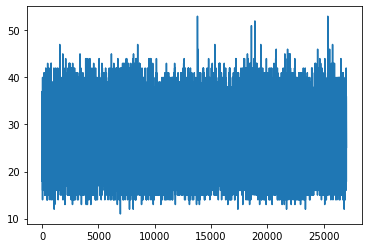

In [28]:
sinasc_raw['IDADEMAE'].plot()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.